In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from plotnine import *
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
from plotly.offline import init_notebook_mode
%matplotlib inline
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\aksha\Downloads\Bike-sharing-demand-main\Bike-sharing-demand-main\SeoulBikeData.csv",encoding = 'unicode_escape',date_parser='Date')

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
data.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [5]:
data.shape

(8760, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
data['Date']=pd.to_datetime(data['Date'])
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Day'] = pd.DatetimeIndex(data['Date']).day
data["Month"]=data["Date"].dt.month_name()
data['weekday']=data["Date"].dt.day_name()

data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday


In [9]:
data['Solar Radiation (MJ/m2)'].value_counts()

0.00    4300
0.01     128
0.02      82
0.03      69
0.06      61
        ... 
3.38       1
2.97       1
3.44       1
3.49       1
3.45       1
Name: Solar Radiation (MJ/m2), Length: 345, dtype: int64

Since most of the values are under 1.0 this data can be left out i.e can be dropped

In [10]:
df = data.copy()

In [11]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday


In [12]:
df = df.drop('Solar Radiation (MJ/m2)',axis=1)

In [13]:
df[df['Wind speed (m/s)']<4.0].value_counts().count()

8454

Windspeed less than 4.0 m/sec is considered a gentle breeze on the Beaufort scale, which is a scale used to measure wind speed and its associated effects.Since there are 8454 rows in 8760 rows with windspeed less than 4.0 m/sec the impact of that data can be negligible.

In [14]:
df = df.drop('Wind speed (m/s)',axis=1)

In [15]:
df['Snowfall (cm)'].describe(percentiles=[.25,.50,.75,.90,.99])

count    8760.000000
mean        0.075068
std         0.436746
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
99%         2.500000
max         8.800000
Name: Snowfall (cm), dtype: float64

Since 90% of the data in snowfall column is 0.0 this column can be dropped as we also have a temperature column which indirectly represents this data.

In [16]:
df = df.drop('Snowfall (cm)',axis=1)

In [17]:
df["label_day_night"]=df["Hour"].apply(lambda x: 'Night' if(x>20 or x< 5) else ('Day'))

In [18]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Dew point temperature(°C),Rainfall(mm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday,label_day_night
0,2017-01-12,254,0,-5.2,37,2000,-17.6,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night
1,2017-01-12,204,1,-5.5,38,2000,-17.6,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night
2,2017-01-12,173,2,-6.0,39,2000,-17.7,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night
3,2017-01-12,107,3,-6.2,40,2000,-17.6,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night
4,2017-01-12,78,4,-6.0,36,2000,-18.6,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night


## EDA

<Axes: >

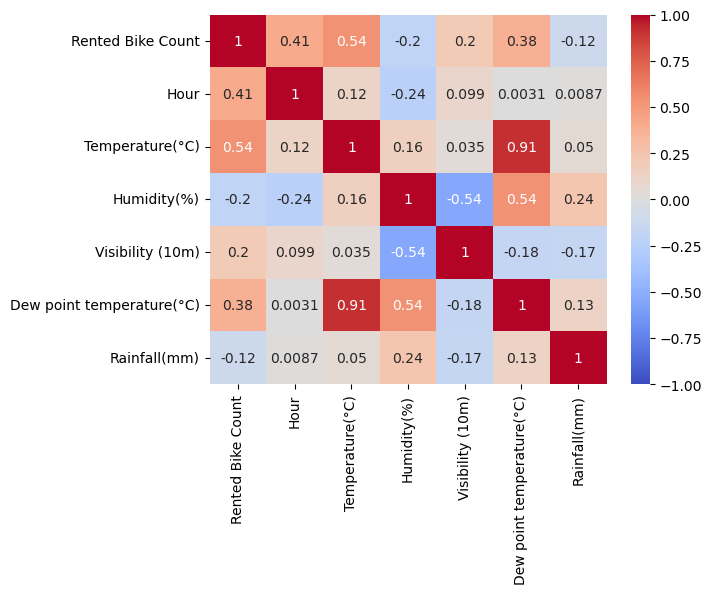

In [19]:
df_n = df.iloc[:,1:8]
sns.heatmap(df_n.corr("pearson"),vmin=-1,vmax=1,annot=True,cmap='coolwarm')

Since "Temperature(°C)" and "Dew point temperature(°C)" can be seen highly correlated, the "Dew point temperature(°C)" column can be dropped to avoid multicollinearity.

In [20]:
df = df.drop('Dew point temperature(°C)',axis=1)

<Axes: xlabel='Year', ylabel='Rented Bike Count'>

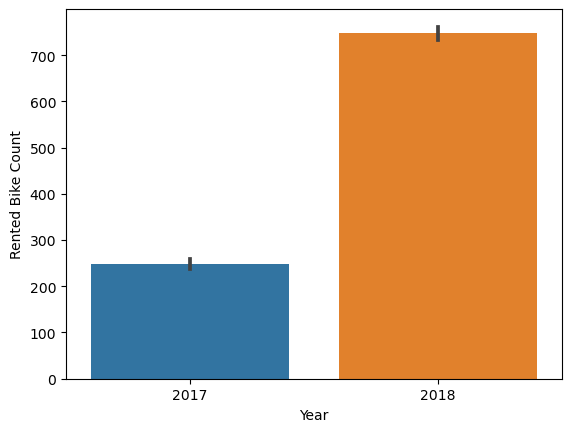

In [21]:
sns.barplot(data=df,x='Year',y='Rented Bike Count')

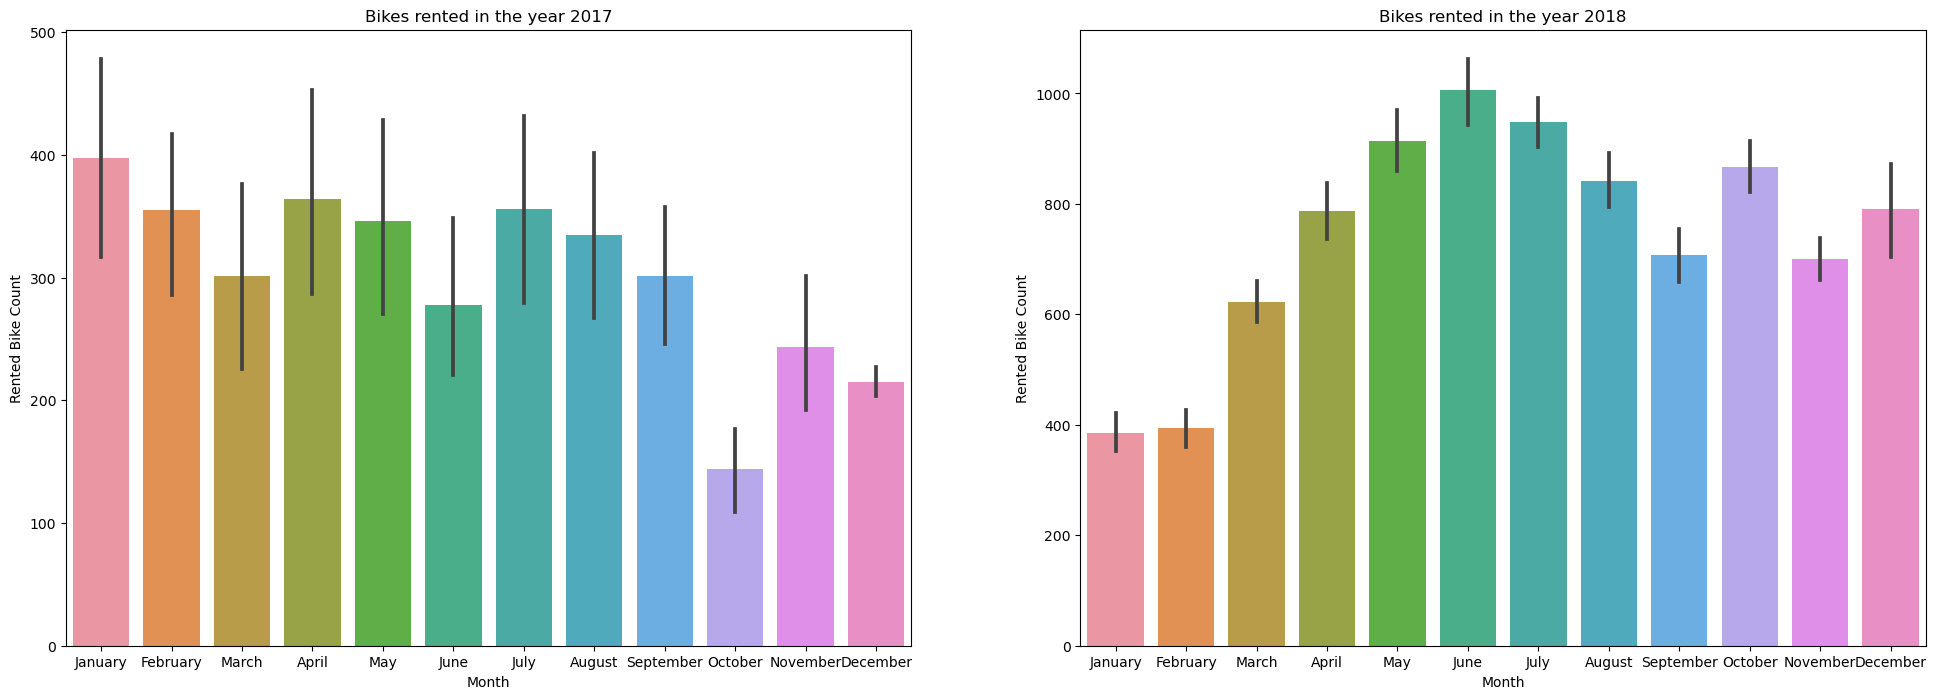

In [22]:
plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
sns.barplot(data=df[df['Year'] == 2017],x='Month',y='Rented Bike Count')
plt.title("Bikes rented in the year 2017")
plt.subplot(1,2,2)
sns.barplot(data=df[df['Year'] == 2018],x='Month',y='Rented Bike Count')
plt.title("Bikes rented in the year 2018")
plt.show()

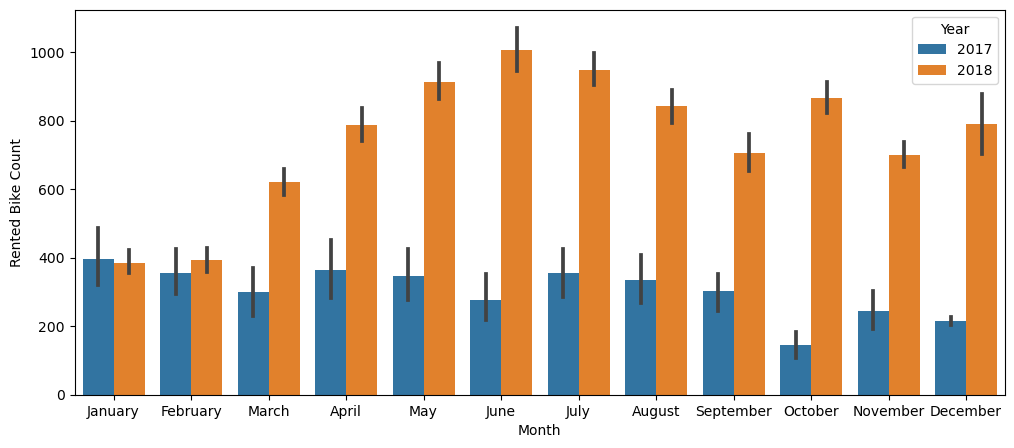

In [23]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='Month',y='Rented Bike Count',hue='Year')
plt.show()

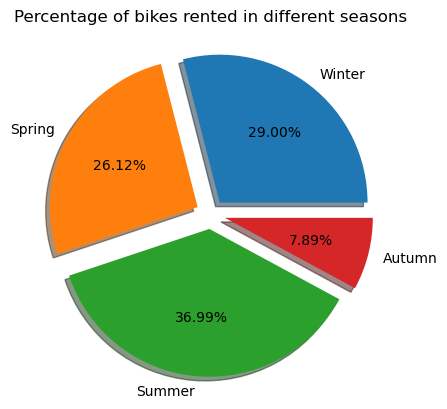

In [24]:
plt.pie(df.groupby('Seasons')['Rented Bike Count'].sum(),labels=df['Seasons'].unique(),shadow=True,explode=(0.1,0.1,0.1,0.1),autopct='%1.2f%%')
plt.title("Percentage of bikes rented in different seasons")
plt.show()

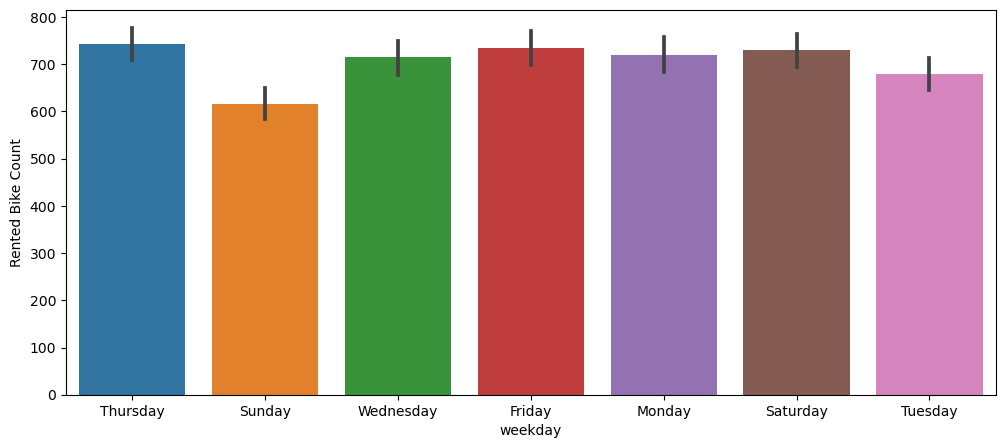

In [25]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='weekday',y='Rented Bike Count')
plt.show()

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

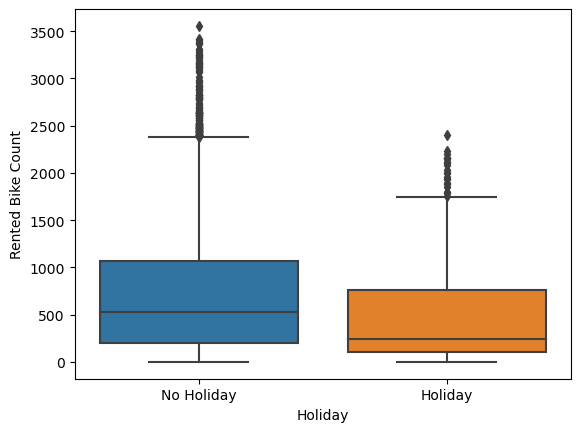

In [26]:
sns.boxplot(data = df,x='Holiday',y='Rented Bike Count')

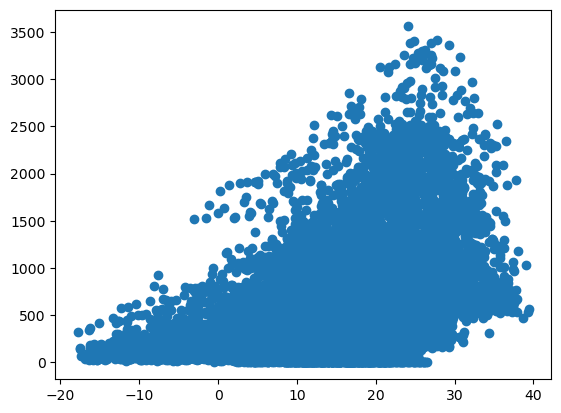

In [27]:
plt.scatter(data=df,x='Temperature(°C)',y='Rented Bike Count')

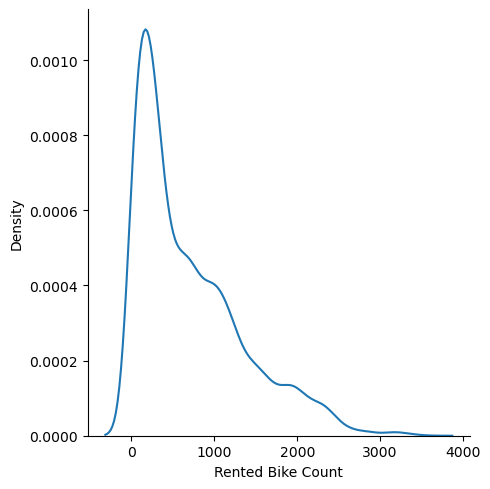

In [28]:
sns.displot(df['Rented Bike Count'],kind='kde')

In [29]:
x = df['Rented Bike Count']
x.skew()

1.1534281773679014

In [30]:
x = np.sqrt(df['Rented Bike Count'])
x.skew()

0.237362090985412

In [31]:
x = np.log(df['Rented Bike Count'])
x.skew()

nan

In [32]:
df['Rented Bike Count'] = np.sqrt(df['Rented Bike Count'])

In [33]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Rainfall(mm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday,label_day_night
0,2017-01-12,15.937377,0,-5.2,37,2000,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night
1,2017-01-12,14.282857,1,-5.5,38,2000,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night
2,2017-01-12,13.152946,2,-6.0,39,2000,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night
3,2017-01-12,10.344080,3,-6.2,40,2000,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night
4,2017-01-12,8.831761,4,-6.0,36,2000,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night


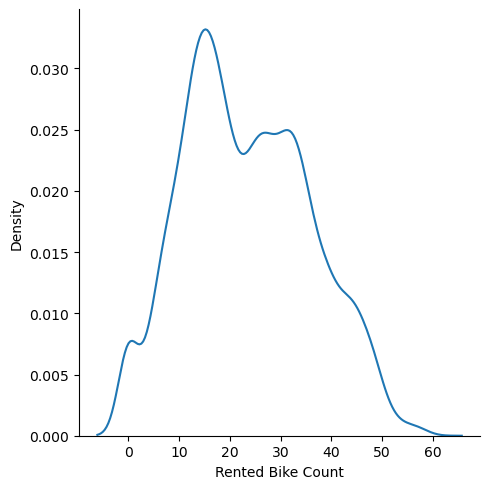

In [34]:
sns.displot(df['Rented Bike Count'],kind='kde')

## Model_Prep

Encoding Categorical Columns

In [35]:
df1 = df.copy()

In [36]:
ordinal_encoder = OrdinalEncoder()
encoded_values = ordinal_encoder.fit_transform(df1[['Seasons','Holiday','Functioning Day','weekday','Month','label_day_night']])
df1[['Seasons','Holiday','Functioning Day','weekday','Month','label_day_night']]=encoded_values

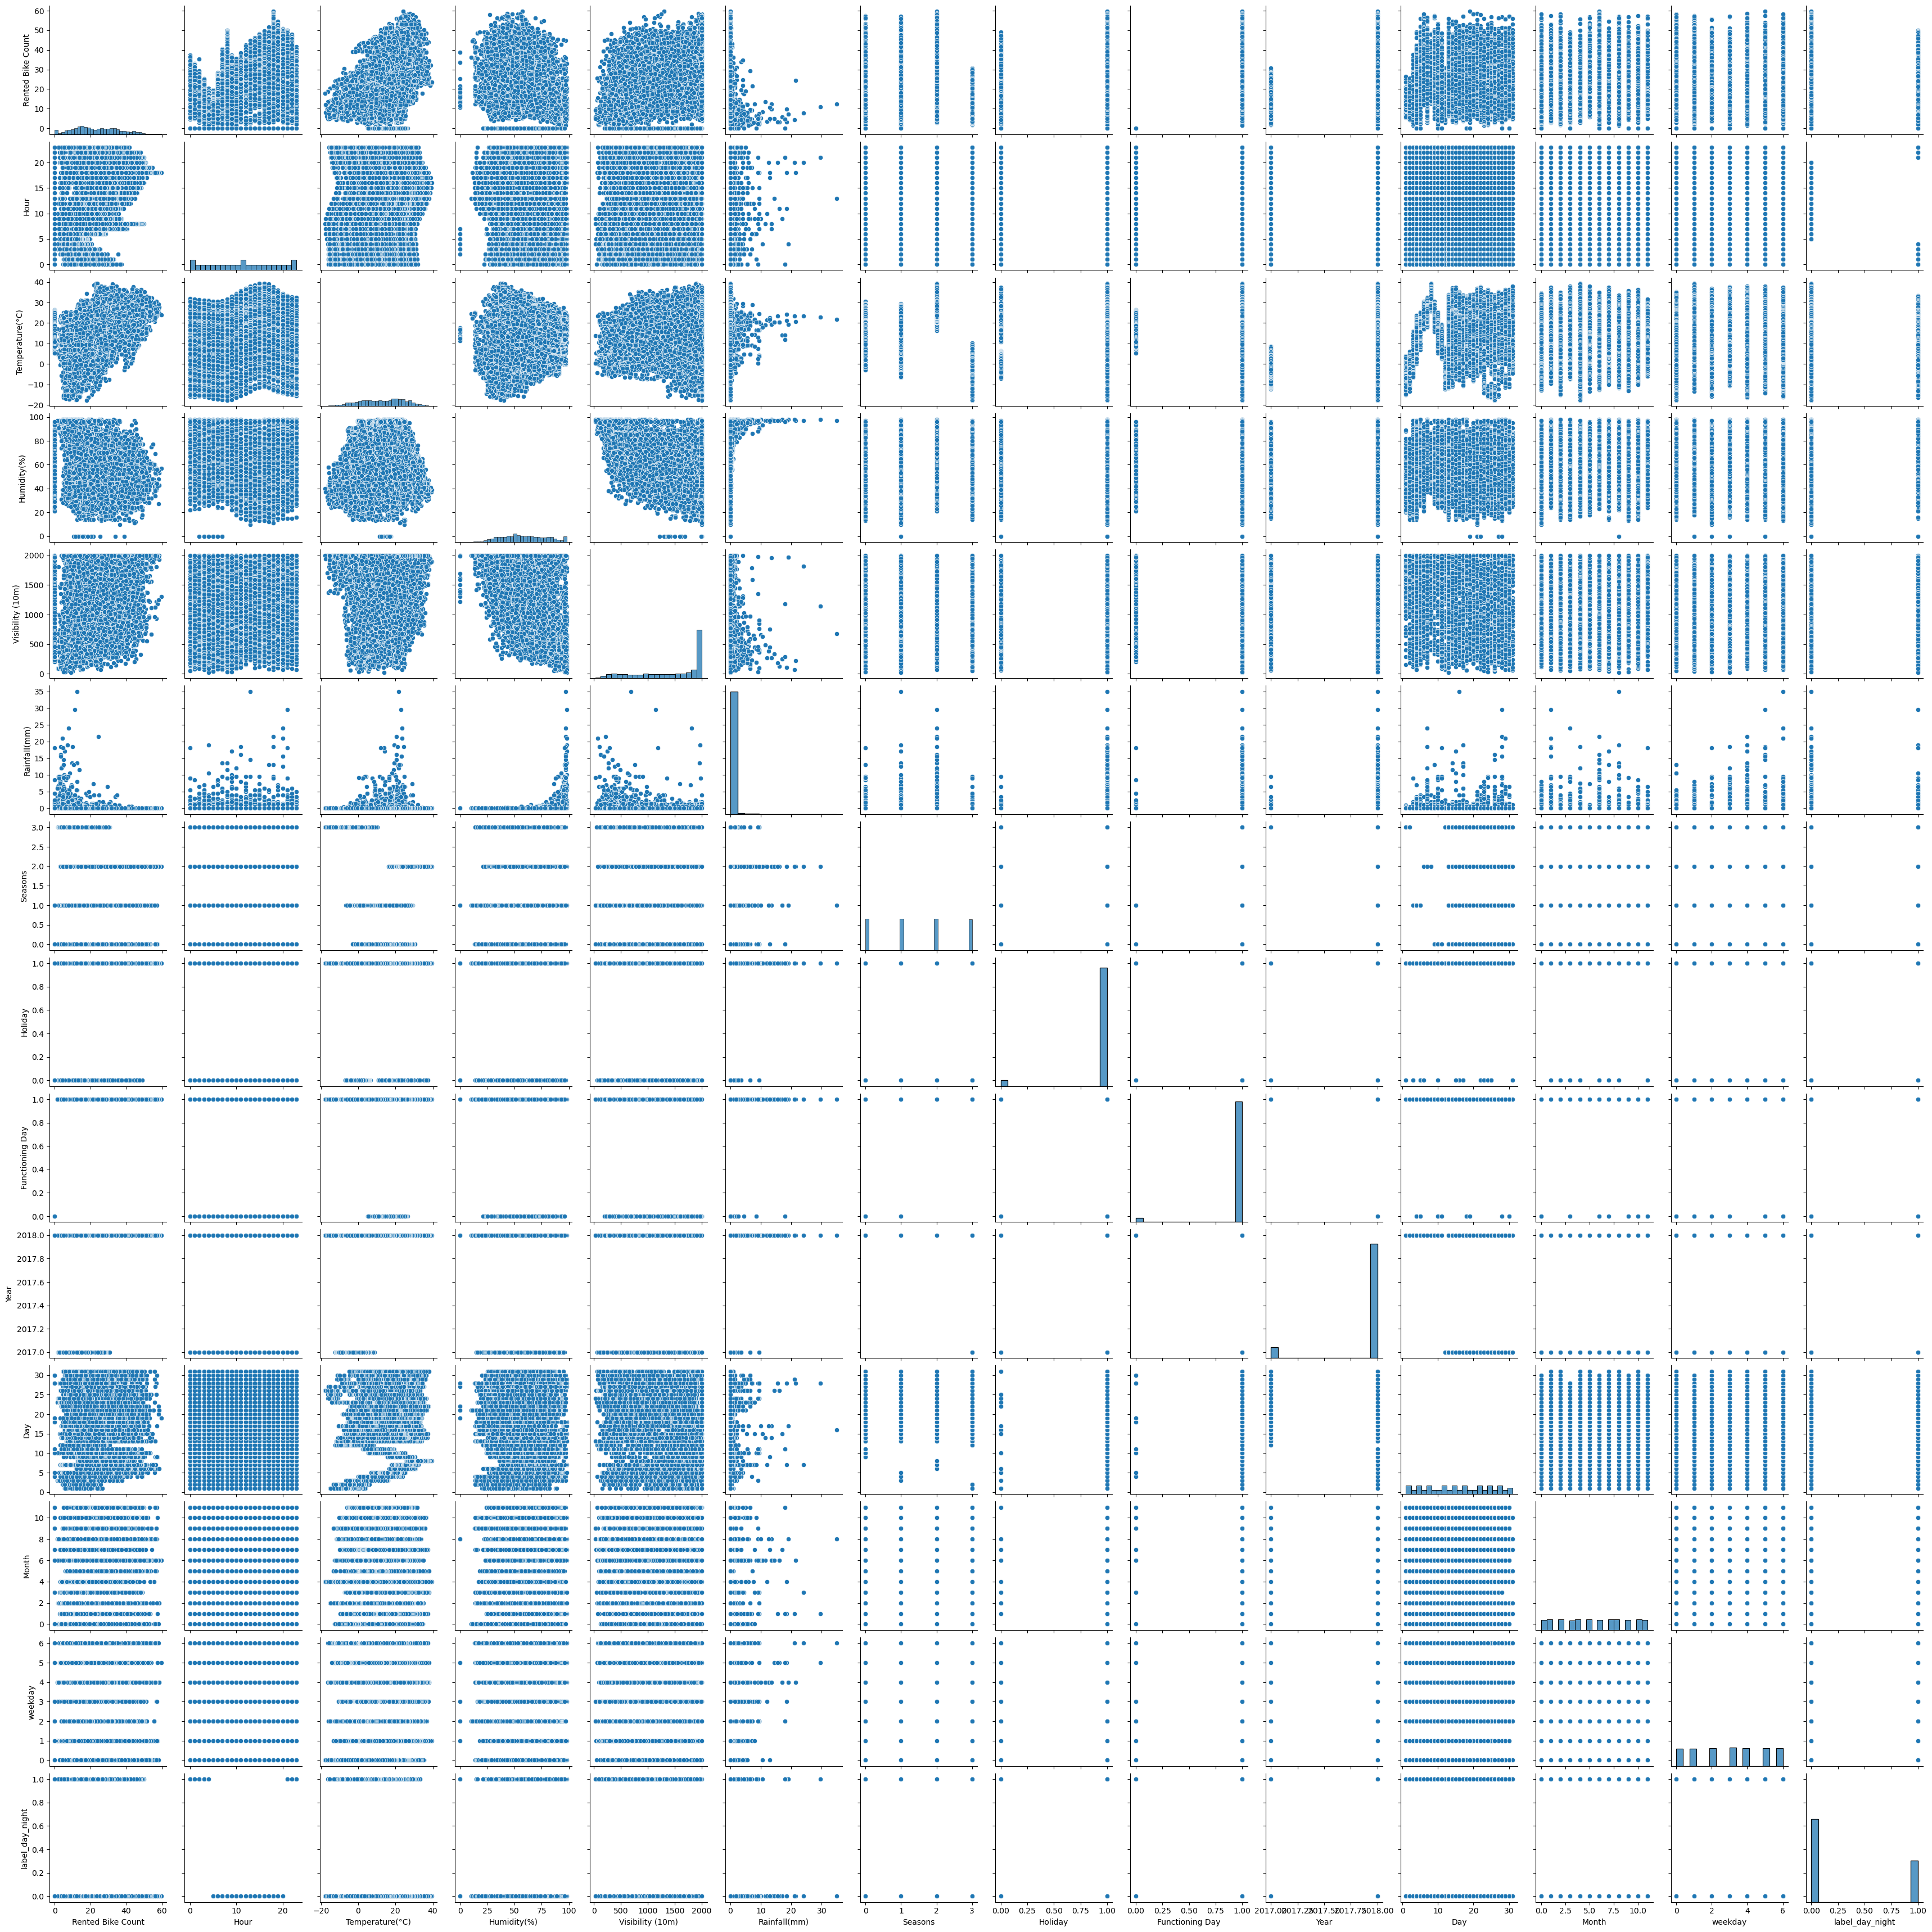

In [37]:
sns.pairplot(data=df1)

In [38]:
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Rainfall(mm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday,label_day_night
0,2017-01-12,15.937377,0,-5.2,37,2000,0.0,3.0,1.0,1.0,2017,12,4.0,4.0,1.0
1,2017-01-12,14.282857,1,-5.5,38,2000,0.0,3.0,1.0,1.0,2017,12,4.0,4.0,1.0
2,2017-01-12,13.152946,2,-6.0,39,2000,0.0,3.0,1.0,1.0,2017,12,4.0,4.0,1.0
3,2017-01-12,10.344080,3,-6.2,40,2000,0.0,3.0,1.0,1.0,2017,12,4.0,4.0,1.0
4,2017-01-12,8.831761,4,-6.0,36,2000,0.0,3.0,1.0,1.0,2017,12,4.0,4.0,1.0


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               8760 non-null   datetime64[ns]
 1   Rented Bike Count  8760 non-null   float64       
 2   Hour               8760 non-null   int64         
 3   Temperature(°C)    8760 non-null   float64       
 4   Humidity(%)        8760 non-null   int64         
 5   Visibility (10m)   8760 non-null   int64         
 6   Rainfall(mm)       8760 non-null   float64       
 7   Seasons            8760 non-null   float64       
 8   Holiday            8760 non-null   float64       
 9   Functioning Day    8760 non-null   float64       
 10  Year               8760 non-null   int64         
 11  Day                8760 non-null   int64         
 12  Month              8760 non-null   float64       
 13  weekday            8760 non-null   float64       
 14  label_da

In [40]:
target = 'Rented Bike Count'

In [41]:
features = list(set(df1.columns.tolist())-{target})
features

['Seasons',
 'Humidity(%)',
 'Hour',
 'Month',
 'Functioning Day',
 'label_day_night',
 'Day',
 'weekday',
 'Visibility (10m)',
 'Holiday',
 'Year',
 'Rainfall(mm)',
 'Date',
 'Temperature(°C)']

In [42]:
X = df1[features].values
y = df1[target].values

In [43]:
df1[features]

,Seasons,Humidity(%),Hour,Month,Functioning Day,label_day_night,Day,weekday,Visibility (10m),Holiday,Year,Rainfall(mm),Date,Temperature(°C)
0,3.0,37,0,4.0,1.0,1.0,12,4.0,2000,1.0,2017,0.0,2017-01-12,-5.2
1,3.0,38,1,4.0,1.0,1.0,12,4.0,2000,1.0,2017,0.0,2017-01-12,-5.5
2,3.0,39,2,4.0,1.0,1.0,12,4.0,2000,1.0,2017,0.0,2017-01-12,-6.0
3,3.0,40,3,4.0,1.0,1.0,12,4.0,2000,1.0,2017,0.0,2017-01-12,-6.2
4,3.0,36,4,4.0,1.0,1.0,12,4.0,2000,1.0,2017,0.0,2017-01-12,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.0,34,19,9.0,1.0,0.0,30,0.0,1894,1.0,2018,0.0,2018-11-30,4.2
8756,0.0,37,20,9.0,1.0,0.0,30,0.0,2000,1.0,2018,0.0,2018-11-30,3.4
8757,0.0,39,21,9.0,1.0,1.0,30,0.0,1968,1.0,2018,0.0,2018-11-30,2.6
8758,0.0,41,22,9.0,1.0,1.0,30,0.0,1859,1.0,2018,0.0,2018-11-30,2.1


In [44]:
df1.drop('Year',axis=1,inplace=True)

In [45]:
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Rainfall(mm),Seasons,Holiday,Functioning Day,Day,Month,weekday,label_day_night
0,2017-01-12,15.937377,0,-5.2,37,2000,0.0,3.0,1.0,1.0,12,4.0,4.0,1.0
1,2017-01-12,14.282857,1,-5.5,38,2000,0.0,3.0,1.0,1.0,12,4.0,4.0,1.0
2,2017-01-12,13.152946,2,-6.0,39,2000,0.0,3.0,1.0,1.0,12,4.0,4.0,1.0
3,2017-01-12,10.344080,3,-6.2,40,2000,0.0,3.0,1.0,1.0,12,4.0,4.0,1.0
4,2017-01-12,8.831761,4,-6.0,36,2000,0.0,3.0,1.0,1.0,12,4.0,4.0,1.0


In [46]:
scaling_columns = ['Hour','Temperature(°C)','Humidity(%)','Visibility (10m)','Rainfall(mm)','Seasons','Month','weekday','Day']
scaler = MinMaxScaler()
df1[scaling_columns]=scaler.fit_transform(df1[scaling_columns])

In [47]:
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Rainfall(mm),Seasons,Holiday,Functioning Day,Day,Month,weekday,label_day_night
0,2017-01-12,15.937377,0.000000,0.220280,0.377551,1.0,0.0,1.0,1.0,1.0,0.366667,0.363636,0.666667,1.0
1,2017-01-12,14.282857,0.043478,0.215035,0.387755,1.0,0.0,1.0,1.0,1.0,0.366667,0.363636,0.666667,1.0
2,2017-01-12,13.152946,0.086957,0.206294,0.397959,1.0,0.0,1.0,1.0,1.0,0.366667,0.363636,0.666667,1.0
3,2017-01-12,10.344080,0.130435,0.202797,0.408163,1.0,0.0,1.0,1.0,1.0,0.366667,0.363636,0.666667,1.0
4,2017-01-12,8.831761,0.173913,0.206294,0.367347,1.0,0.0,1.0,1.0,1.0,0.366667,0.363636,0.666667,1.0


In [48]:
df1.drop('Date',inplace=True,axis=1)

In [49]:
df1.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Rainfall(mm),Seasons,Holiday,Functioning Day,Day,Month,weekday,label_day_night
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,23.443395,0.500000,0.536415,0.594145,0.714559,0.004248,0.498630,0.950685,0.966324,0.490685,0.500872,0.505479,0.333333
std,12.450984,0.300982,0.208826,0.207780,0.308312,0.032234,0.371469,0.216537,0.180404,0.293225,0.313539,0.332393,0.471431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.820275,0.250000,0.372378,0.428571,0.462747,0.000000,0.333333,1.000000,1.000000,0.233333,0.181818,0.166667,0.000000
50%,22.461075,0.500000,0.550699,0.581633,0.846934,0.000000,0.333333,1.000000,1.000000,0.500000,0.545455,0.500000,0.000000
75%,32.638167,0.750000,0.704545,0.755102,1.000000,0.000000,0.666667,1.000000,1.000000,0.733333,0.727273,0.833333,1.000000
max,59.632206,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
y_train = df1.iloc[:,:1]
X_train = df1.iloc[:,1:]

In [51]:
X_train

,Hour,Temperature(°C),Humidity(%),Visibility (10m),Rainfall(mm),Seasons,Holiday,Functioning Day,Day,Month,weekday,label_day_night
0,0.000000,0.220280,0.377551,1.000000,0.0,1.0,1.0,1.0,0.366667,0.363636,0.666667,1.0
1,0.043478,0.215035,0.387755,1.000000,0.0,1.0,1.0,1.0,0.366667,0.363636,0.666667,1.0
2,0.086957,0.206294,0.397959,1.000000,0.0,1.0,1.0,1.0,0.366667,0.363636,0.666667,1.0
3,0.130435,0.202797,0.408163,1.000000,0.0,1.0,1.0,1.0,0.366667,0.363636,0.666667,1.0
4,0.173913,0.206294,0.367347,1.000000,0.0,1.0,1.0,1.0,0.366667,0.363636,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.826087,0.384615,0.346939,0.946275,0.0,0.0,1.0,1.0,0.966667,0.818182,0.000000,0.0
8756,0.869565,0.370629,0.377551,1.000000,0.0,0.0,1.0,1.0,0.966667,0.818182,0.000000,0.0
8757,0.913043,0.356643,0.397959,0.983781,0.0,0.0,1.0,1.0,0.966667,0.818182,0.000000,1.0
8758,0.956522,0.347902,0.418367,0.928535,0.0,0.0,1.0,1.0,0.966667,0.818182,0.000000,1.0


In [52]:
y_train

,Rented Bike Count
0,15.937377
1,14.282857
2,13.152946
3,10.344080
4,8.831761
...,...
8755,31.670175
8756,27.640550
8757,26.343880
8758,26.683328


In [53]:
from sklearn.feature_selection import RFE

In [54]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             
rfe = rfe.fit(X_train, y_train)

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Hour', True, 1),
 ('Temperature(°C)', True, 1),
 ('Humidity(%)', True, 1),
 ('Visibility (10m)', False, 4),
 ('Rainfall(mm)', True, 1),
 ('Seasons', True, 1),
 ('Holiday', False, 2),
 ('Functioning Day', True, 1),
 ('Day', False, 7),
 ('Month', False, 3),
 ('weekday', False, 6),
 ('label_day_night', False, 5)]

In [56]:
X_train_new = X_train.columns[~rfe.support_]

In [57]:
X_train_new

Index(['Visibility (10m)', 'Holiday', 'Day', 'Month', 'weekday',
       'label_day_night'],
      dtype='object')

In [58]:
df2 = df1.drop(X_train_new,axis=1)

In [59]:
df2

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Rainfall(mm),Seasons,Functioning Day
0,15.937377,0.000000,0.220280,0.377551,0.0,1.0,1.0
1,14.282857,0.043478,0.215035,0.387755,0.0,1.0,1.0
2,13.152946,0.086957,0.206294,0.397959,0.0,1.0,1.0
3,10.344080,0.130435,0.202797,0.408163,0.0,1.0,1.0
4,8.831761,0.173913,0.206294,0.367347,0.0,1.0,1.0
...,...,...,...,...,...,...,...
8755,31.670175,0.826087,0.384615,0.346939,0.0,0.0,1.0
8756,27.640550,0.869565,0.370629,0.377551,0.0,0.0,1.0
8757,26.343880,0.913043,0.356643,0.397959,0.0,0.0,1.0
8758,26.683328,0.956522,0.347902,0.418367,0.0,0.0,1.0


In [60]:
y = df2.iloc[:,:1]
X = df2.iloc[:,1:]
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=0)

In [61]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [62]:
from sklearn.metrics import accuracy_score
train_pred = model.predict(X_train)
train_pred

array([[25.2906243 ],
       [34.36123726],
       [18.07989968],
       ...,
       [30.16992228],
       [17.62081607],
       [23.4257105 ]])

In [73]:
y_train=np.array(y_train)
y_train

array([[19.46792233],
       [32.48076354],
       [11.04536102],
       ...,
       [32.64965543],
       [20.02498439],
       [22.64950331]])

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Sample predicted and actual values
predicted_values = train_pred
actual_values = y_train

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r2 = r2_score(actual_values, predicted_values)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 5.697642345219362
Mean Squared Error (MSE): 55.181300495472854
Root Mean Squared Error (RMSE): 7.428411707456235
R-squared (R²): 0.6416581774565218


In [74]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
train_pred = dtr.predict(X_train)
test_pred = dtr.predict(X_test)

In [75]:
predicted_values = train_pred
actual_values = y_train

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r2 = r2_score(actual_values, predicted_values)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 0.00759976056496694
Mean Squared Error (MSE): 0.019097397895746552
Root Mean Squared Error (RMSE): 0.13819333520740626
R-squared (R²): 0.9998759834163684


In [76]:
predicted_values = test_pred
actual_values = y_test

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r2 = r2_score(actual_values, predicted_values)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 3.721971063668735
Mean Squared Error (MSE): 32.17469303504035
Root Mean Squared Error (RMSE): 5.672274062053098
R-squared (R²): 0.7963193922649362


In [80]:
# Importing required libraries
from sklearn.ensemble import GradientBoostingRegressor

# Creating and training the GradientBoostingRegressor model
# You can adjust the hyperparameters as needed
# n_estimators: Number of boosting stages to be run (more trees, more complexity)
# learning_rate: Shrinkage parameter to control the contribution of each tree
# max_depth: Maximum depth of the individual trees (controls complexity)
# subsample: Fraction of samples to be used for fitting the individual trees (random subsampling)
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8, random_state=42)

# Fitting the model on the training data
gbr_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = gbr_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 20.616247377502255
R-squared: 0.8694896703290084


In [81]:
train_pred = gbr_model.predict(X_train)
test_pred = gbr_model.predict(X_test)
predicted_values = test_pred
actual_values = y_test

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r2 = r2_score(actual_values, predicted_values)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 3.2271584724301556
Mean Squared Error (MSE): 20.616247377502255
Root Mean Squared Error (RMSE): 4.540511796868526
R-squared (R²): 0.8694896703290084


In [82]:
predicted_values = train_pred
actual_values = y_train

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r2 = r2_score(actual_values, predicted_values)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 3.0207825146655076
Mean Squared Error (MSE): 17.718138353686836
Root Mean Squared Error (RMSE): 4.209291906447786
R-squared (R²): 0.884940189290056
